# My Ranked Watchlist

#####  I am a big fan of movies and I have more than 400 movies rated in my IMDB user account.  Also, I have more than 200 movies in my IMDB watchlist and I really like to go through them on an order that I would enjoy the most.  For this reason, I decided to take advantage of other imdb ratings and see if I can rank my watchlist.

After some searching through internet, I was able to find 19 other IMDB users who have rated a few hundred movies just like mine.  So, I decided to propose a metric to quantify the similarity between my movie taste and other 19 IMDB users.

In [25]:
#%reset
%matplotlib inline
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r'C:\Users\Saina\Desktop\1-Insight\2-myPractice\4-myimdb\UserRatings'                     
files = glob.glob(os.path.join(path, "*.csv"))     

df1 = pd.read_csv('ratingsSaina.csv')
df1 = df1.drop(df1.ix[:,:5],axis=1) ## drop the first 5 columns
df1 = df1.drop(df1.ix[:,3:4],axis=1) ## drop UserRating to let the concatenation not include same movies
df1 = df1.drop(df1.ix[:,-3:],axis=1)  ## drop last two columns
df = df1

for f in files:
    dat1 = pd.read_csv(f)
    dat1 = dat1.drop(dat1.ix[:,:5],axis=1)
    dat1 = dat1.drop(dat1.ix[:,3:4],axis=1)
    dat = dat1.drop(dat1.ix[:,-3:],axis=1)
    df = pd.concat([dat,df]).drop_duplicates().reset_index(drop=True)
df = df[(df.TitleType=='Feature Film')|(df.TitleType=='TV Movie')]  ### disregarding short films or TV shows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 12251
Data columns (total 7 columns):
Title         9658 non-null object
TitleType     9658 non-null object
Directors     9640 non-null object
IMDbRating    9601 non-null float64
Runtime       9138 non-null float64
Year          9658 non-null int64
Genres        9372 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 603.6+ KB


#### Preparing all movies ratings...

In [28]:
### adding the rating of 20 users the to film directory
df12 = pd.read_csv('ratingsSaina.csv')
df2 = pd.concat([df1,df12.ix[:,8:9]],axis=1)
df2.head()
data = df.merge(df2,on=['Title','TitleType','Directors','IMDbRating','Runtime','Year','Genres'],how='left')

for f in files:
    dt1 = pd.read_csv(f)
    dt1 = dt1.drop(dt1.ix[:,:5],axis=1)
    dtt = dt1.drop(dt1.ix[:,-3:],axis=1)
    data = data.merge(dtt,on=['Title','TitleType','Directors','IMDbRating','Runtime','Year','Genres'],how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9657
Data columns (total 27 columns):
Title            9658 non-null object
TitleType        9658 non-null object
Directors        9640 non-null object
IMDbRating       9601 non-null float64
Runtime          9138 non-null float64
Year             9658 non-null int64
Genres           9372 non-null object
MyRating         346 non-null float64
AlexRating       762 non-null float64
BabakRating      533 non-null float64
DavidRating      56 non-null float64
DibRating        866 non-null float64
DrRating         492 non-null float64
ElhamRating      116 non-null float64
EllaRating       614 non-null float64
GlenRating       1608 non-null float64
GoergRating      381 non-null float64
JuliRating       292 non-null float64
LiliRating       88 non-null float64
LuisRating       545 non-null float64
MehrdadRating    139 non-null float64
MerviRating      137 non-null float64
NonaRating       262 non-null float64
NutRating        14

### Feature Engineering

#### I consider an interesting metric to normalize my features:
I normalize my own rating relative to the IMDB rating of the movie and bringing it between 0 and 1, using min and max 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7FFDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000127F2198>]], dtype=object)

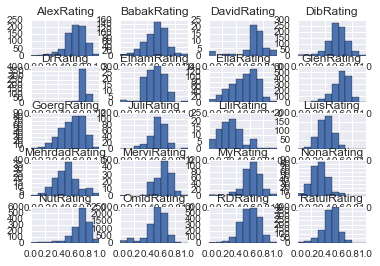

In [31]:
### normalizing every user rating relative to average rating and his own rating habit
new = data.iloc[:,7:].sub(data['IMDbRating'],axis='rows') ## subtracting IMDB rating from my rating
relative = (new - new.min())/(new.max()- new.min())
relative.hist()

### Introducing two features to quantify the similarity between me and other users:
#### i) percentage of movies that we have in common (we have tried watching similar movies)
#### ii) the average relative rating that we rated the movies (1 quantity)

In [32]:
### metric 1 & 2
score=[] ## percentage of movies that we both rated
rate = [] ## the rating that we used
for ic in range(19):
    common = relative.iloc[:,[0,ic+1]].notnull().all(axis=1)
    val = sum(common)/(1.0*min(relative.iloc[:,0].count(),relative.iloc[:,ic+1].count()))
    rateM = 1-abs(relative.iloc[:,[0,ic+1]][common].mean()[0]-relative.iloc[:,[0,ic+1]][common].mean()[1])
    score.append(val)
    rate.append(rateM)
print score
print rate

[0.27456647398843931, 0.22254335260115607, 0.23214285714285715, 0.2947976878612717, 0.095375722543352595, 0.2413793103448276, 0.083815028901734104, 0.30057803468208094, 0.06358381502890173, 0.054982817869415807, 0.14772727272727273, 0.20520231213872833, 0.36690647482014388, 0.094890510948905105, 0.27099236641221375, 0.37572254335260113, 0.79190751445086704, 0.19942196531791909, 0.39595375722543352]
[0.94235960313366074, 0.92258258219891265, 0.87923106877546131, 0.95727564797675913, 0.86166646949800851, 0.8252924803693058, 0.8952829723052087, 0.96199052949720532, 0.91824022939677163, 0.92082151201602125, 0.77901062083745909, 0.78346209536152955, 0.86884048011728066, 0.95919762935947117, 0.70486431047343245, 0.83786484543493889, 0.97031946541225522, 0.89363947714211811, 0.98045978579712112]


### Let's represent every movie by only the first genres...
### i) since "drama" is the most popular movie genres, I use it as a metric to measure similarity. Besically, the relative median rating every user gives to a drama movie is considered as a measure of similarity, here!
### ii) also, the fraction of dramas being rated by every user is another measure of similarity 

In [36]:
### metric 3,4
### Reducing the Genres to the first entry
gn = data['Genres'].str.split(',').str[0]
drama = (data.MyRating[gn=='drama'].count()/(1.0*data.MyRating.count()))
dramaM = relative.ix[:,0][gn=='drama'].median()

propDrama=[]
dramaMean = []
for ic in range(19):
    val = relative.ix[:,ic+1][gn=='drama'].count()/(1.0*relative.ix[:,ic+1].count())
    prop = 1-abs(drama-val)
    propDrama.append(prop)
    
    valM = 1-abs(dramaM-relative.ix[:,ic+1][gn=='drama'].median())
    dramaMean.append(valM)
    
print propDrama
print dramaMean

[0.87507775400907262, 0.62225487750653408, 0.56513212221304698, 0.7751445086705202, 0.93838996193430146, 0.84188758222045046, 0.60765189885334481, 0.72549104190032498, 0.60867355453400696, 0.66963629501618893, 0.70474251182343672, 0.6344964734581322, 0.99923067326485637, 0.69404244546643601, 0.8703393195958169, 0.75031501890113406, 0.76642818958537184, 0.64320847045068563, 0.68704689897857008]
[0.9741281057670389, 0.86829808165273, 0.9781931464174455, 0.9331218382920347, 0.8727079143499349, 0.8805639157294473, 0.7965816283573294, 0.9979973297730307, 0.9676401869158879, 0.8729973297730308, 0.7513666020102275, 0.7653965971722982, 0.9051401869158878, 0.9892865283793026, 0.6988901869158878, 0.8948598130841121, 0.8841256941622646, 0.8486466804223813, 0.9651401869158879]


### another metric is the number of movies that I would like to watch, and other users have already watched them!

In [37]:
###watchlist
watchList = pd.read_csv('MyWatchlist.csv')
watchList = watchList.ix[:,5:12]
Movies = pd.merge(watchList,data, on=['Title','TitleType','Directors','IMDbRating',
                                      'Runtime','Year','Genres'], how='inner')
print len(Movies), len(watchList)

watch=[]
for ic in range(19):
    val = Movies.ix[:,ic+8].count()/(1.0*min(len(data.ix[:,ic+8]),len(Movies)))
    watch.append(val)
    
print watch

180 232
[0.37222222222222223, 0.10000000000000001, 0.0055555555555555558, 0.32777777777777778, 0.26111111111111113, 0.077777777777777779, 0.066666666666666666, 0.36666666666666664, 0.077777777777777779, 0.072222222222222215, 0.011111111111111112, 0.03888888888888889, 0.050000000000000003, 0.027777777777777776, 0.072222222222222215, 0.43888888888888888, 0.91111111111111109, 0.14444444444444443, 0.34444444444444444]


### Constructing the feature matrix with the five features developed so far...


In [39]:
### constructing the similarity matrix
simMat = np.matrix([score,rate,propDrama,dramaMean,watch])

In [40]:
print np.sqrt(np.square(simMat).mean(0))

[[ 0.75055505  0.64059767  0.64856836  0.71864957  0.70170357  0.6677707
   0.60279086  0.73110236  0.65727748  0.64291345  0.58138079  0.57373355
   0.73617183  0.69140707  0.60356021  0.6927561   0.86808424  0.63137044
   0.72667073]]


#### Omid's taste with 0.87 similarity factor is the closest to mine

In [41]:
##Omid's taste is closest to mine.  Lets check how many of my watchlist he has rated already
print simMat[:,-3]

[[ 0.79190751]
 [ 0.97031947]
 [ 0.76642819]
 [ 0.88412569]
 [ 0.91111111]]


### Conslusion: These are the first 20 movies that I should watch from my watchlist, in the order represented below!

In [43]:
myRank = Movies.ix[:,[0,2,3,5,16+8]][Movies.ix[:,16+8].notnull()]
myMovies = myRank.sort_values(by=['OmidRating'],ascending=False)
myMovies = myMovies.reset_index()
myMovies.iloc[:20,:]

,index,Title,Directors,IMDbRating,Year,OmidRating
0,179,The Salesman,Asghar Farhadi,9.3,2016,10.0
1,163,Once Upon a Time in America,Sergio Leone,8.4,1984,10.0
2,77,Amores perros,Alejandro González Iñárritu,8.1,2000,10.0
3,105,A Very Long Engagement,Jean-Pierre Jeunet,7.7,2004,10.0
4,123,Like Someone in Love,Abbas Kiarostami,6.9,2012,10.0
5,28,Dances with Wolves,Kevin Costner,8.0,1990,10.0
6,54,The Legend of 1900,Giuseppe Tornatore,8.1,1998,10.0
7,147,Bicycle Thieves,Vittorio De Sica,8.3,1948,10.0
8,156,"The Good, the Bad and the Ugly",Sergio Leone,8.9,1966,10.0
9,52,Modern Times,Charlie Chaplin,8.6,1936,10.0
